<a href="https://colab.research.google.com/github/TAUforPython/machinelearning/blob/main/example_PCA_ICA_SNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

from sklearn.decomposition import PCA, FastICA


# Generate Data

Пусть
Y
0
,
Y
1
,
…
,
Y
n
 — независимые стандартные нормальные случайные величины, такие что
Y
i
∼
N
(
0
,
1
)
,
i
=
1
…
n
. Тогда распределение случайной величины
t
выглядит так

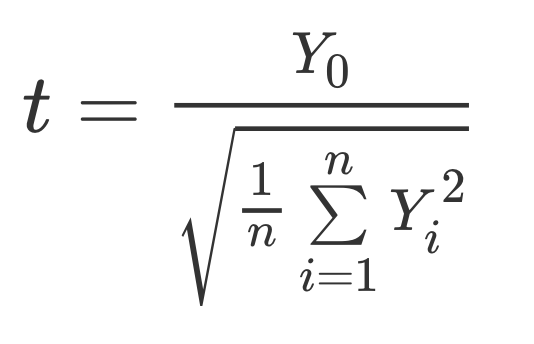

In [2]:
import matplotlib.pyplot as plt


def plot_samples(S, axis_list=None):
    plt.scatter(
        S[:, 0], S[:, 1], s=2, marker="o", zorder=10, color="steelblue", alpha=0.5
    )
    if axis_list is not None:
        for axis, color, label in axis_list:
            x_axis, y_axis = axis / axis.std()
            plt.quiver(
                (0, 0),
                (0, 0),
                x_axis,
                y_axis,
                zorder=11,
                width=0.01,
                scale=6,
                color=color,
                label=label,
            )

    plt.hlines(0, -5, 5, color="black", linewidth=0.5)
    plt.vlines(0, -3, 3, color="black", linewidth=0.5)
    plt.xlim(-5, 5)
    plt.ylim(-3, 3)
    plt.gca().set_aspect("equal")
    plt.xlabel("x")
    plt.ylabel("y")


In [5]:
# паресекающиеся множества

import random
n_samples = 500

A = np.random.normal(0, 6, n_samples)
Xa = np.random.normal(-1,1,n_samples)
Ya = np.zeros(n_samples)
A = np.hstack((Xa,A))

B = np.random.normal(0, 1, n_samples)
Xb = np.random.normal(-6,6,n_samples)
Yb = np.ones(n_samples)
B = np.hstack((Xb,B))

X = np.vstack((A,B))
y = np.hstack((Ya,Yb))

# original data
X = X.T

# Mix data
Rotation = np.array([[3, 1], [1, 2]])  # Mixing matrix

Xmixed = np.dot(X, Rotation.T)  # Generate observations

In [52]:
# T-destribution

rng = np.random.RandomState(42)
X = rng.standard_t(1.5, size=(20000, 2))
X[:, 0] *= 2.0

# Mix data
Rotation = np.array([[3, 1], [1, 2]])  # Mixing matrix

Xmixed = np.dot(X, Rotation.T)  # Generate observations

Text(0.5, 1.0, 'True Independent Sources')

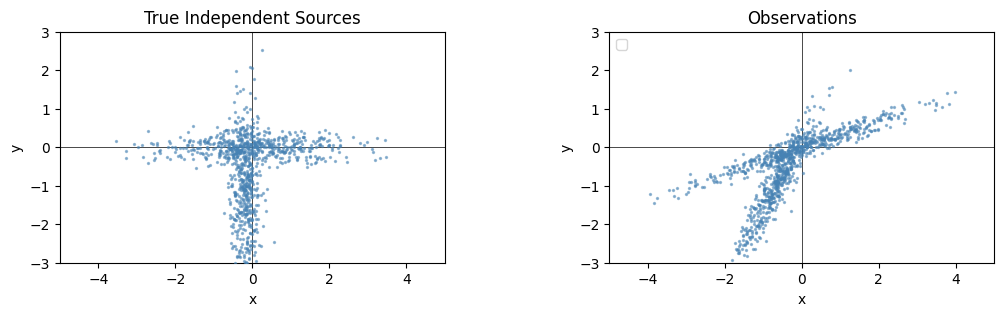

In [6]:
plt.rcParams["figure.figsize"] = (13,3)

plt.subplot(1, 2, 2)
plot_samples(Xmixed/ np.std(Xmixed))
legend = plt.legend(loc="upper left")
legend.set_zorder(100)
plt.title("Observations")


plt.subplot(1, 2, 1)
plot_samples(X / X.std())
plt.title("True Independent Sources")

In [8]:
pca = PCA()
S_pca_ = pca.fit(Xmixed).transform(Xmixed)

ica = FastICA(random_state=123, whiten="arbitrary-variance")
S_ica_ = ica.fit(Xmixed).transform(Xmixed)  # Estimate the sources

Text(0.5, 1.0, 'Observations')

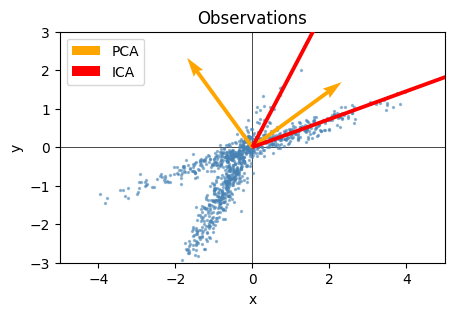

In [9]:
plt.rcParams["figure.figsize"] = (13,3)

axis_list = [(pca.components_.T, "orange", "PCA"), (ica.mixing_, "red", "ICA")]
plot_samples(Xmixed / np.std(Xmixed), axis_list=axis_list)
legend = plt.legend(loc="upper left")
legend.set_zorder(100)

plt.title("Observations")

<ipython-input-10-322819fa4409>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


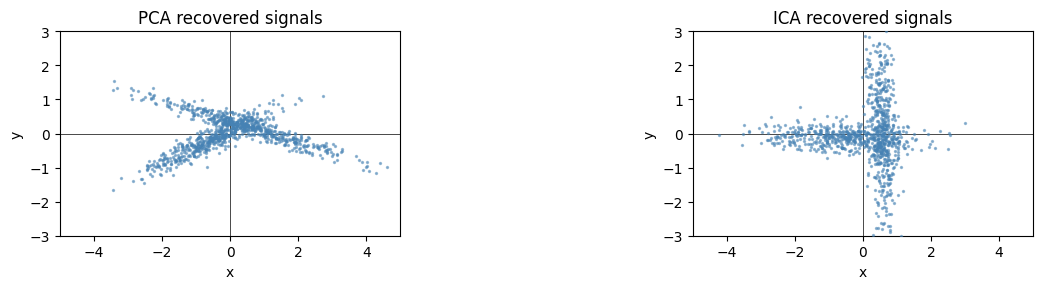

In [10]:
plt.rcParams["figure.figsize"] = (13,3)


plt.title("Observations")

plt.subplot(1, 2, 1)
plot_samples(S_pca_ / np.std(S_pca_))
plt.title("PCA recovered signals")

plt.subplot(1, 2, 2)
plot_samples(S_ica_ / np.std(S_ica_))
plt.title("ICA recovered signals")

plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.36)
plt.tight_layout()
plt.show()

# SNE

In [11]:
from time import time

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import NullFormatter

from sklearn import datasets, manifold

In [271]:
import random
n_samples = 1550

A = np.random.normal(0, 1, n_samples)*6
Xa = np.random.normal(-2,2,n_samples)
#random.shuffle(Xa)
Ya = np.zeros(n_samples)
A = np.vstack((Xa,A))
A=A.T
X=A

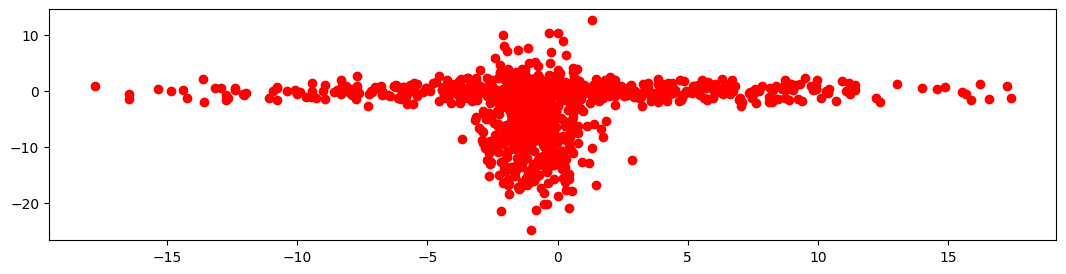

In [12]:
plt.scatter(X[:, 0], X[:, 1], c="r")


In [13]:
import random
n_samples = 500

A = np.random.normal(0, 6, n_samples)
Xa = np.random.normal(-1,1,n_samples)
Ya = np.zeros(n_samples)
A = np.hstack((Xa,A))

B = np.random.normal(0, 1, n_samples)
Xb = np.random.normal(-6,6,n_samples)
Yb = np.ones(n_samples)
B = np.hstack((Xb,B))

X = np.vstack((A,B))
y = np.hstack((Ya,Yb))
X = X.T

In [14]:
# Mix data
A = np.array([[3, 1], [1, 2]])  # Mixing matrix

X = np.dot(X, A.T)  # Generate observations

(-61.34637982447339,
 59.370938164250234,
 -52.28335590769203,
 23.191161866983677)

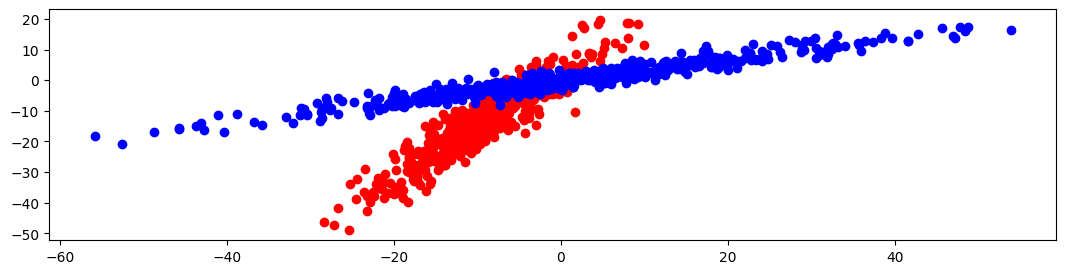

In [15]:
plt.rcParams["figure.figsize"] = (13,3)

red = y == 0
blue = y == 1

plt.scatter(X[red, 0], X[red, 1], c="r")
plt.scatter(X[blue, 0], X[blue, 1], c="b")
#ax.xaxis.set_major_formatter(NullFormatter())
#ax.yaxis.set_major_formatter(NullFormatter())
plt.axis("tight")


circles, perplexity=1 in 3.2 sec
circles, perplexity=5 in 1.6 sec
circles, perplexity=10 in 1.6 sec
circles, perplexity=15 in 1.6 sec
circles, perplexity=20 in 1.7 sec
circles, perplexity=30 in 2 sec
circles, perplexity=40 in 2.7 sec
circles, perplexity=50 in 3.3 sec
circles, perplexity=100 in 3.8 sec


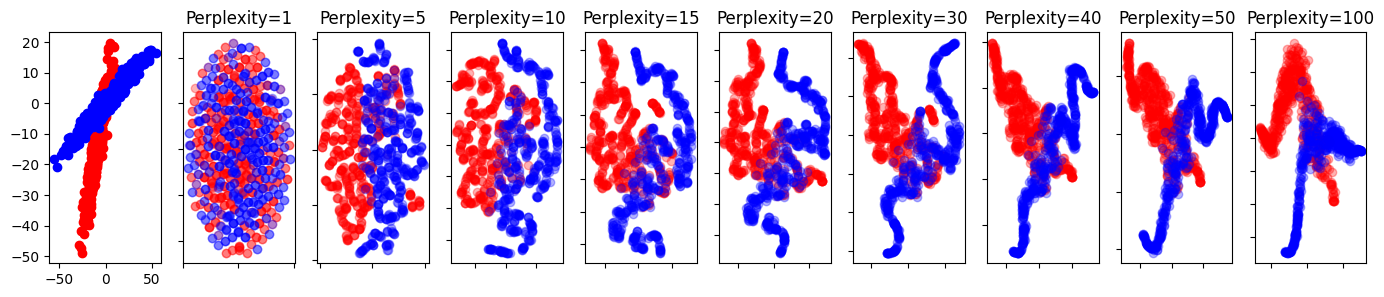

In [16]:
n_samples = 150
n_components = 2
perplexities = [1, 5, 10, 15, 20, 30, 40, 50, 100]

(fig, subplots) = plt.subplots(1, len(perplexities)+1, figsize=(17, 3))

red = y == 0
blue = y == 1

ax = subplots[0]
ax.scatter(X[red, 0], X[red, 1], c="r")
ax.scatter(X[blue, 0], X[blue, 1], c="b")
#ax.xaxis.set_major_formatter(NullFormatter())
#ax.yaxis.set_major_formatter(NullFormatter())
plt.axis("tight")

for i, perplexity in enumerate(perplexities):
    ax = subplots[i + 1]

    t0 = time()
    tsne = manifold.TSNE(
        n_components=n_components,
        init="random",
        random_state=0,
        perplexity=perplexity,
        max_iter=300,
    )
    Y = tsne.fit_transform(X)
    t1 = time()
    print("circles, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[red, 0], Y[red, 1], c="r", alpha=0.3)
    ax.scatter(Y[blue, 0], Y[blue, 1], c="b", alpha=0.3)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis("tight")
